# IPL 2022 Analysis 
Jamil Ahmad, jamil.ad6112gmail.com

#### Python Library Installation

In [2]:
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go

#### Data Import

In [19]:
df = pd.read_csv("IPL 2022.csv")

In [51]:
df.head(5)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,NaN,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,NaN,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,NaN,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,NaN,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,NaN,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


## Visualizations

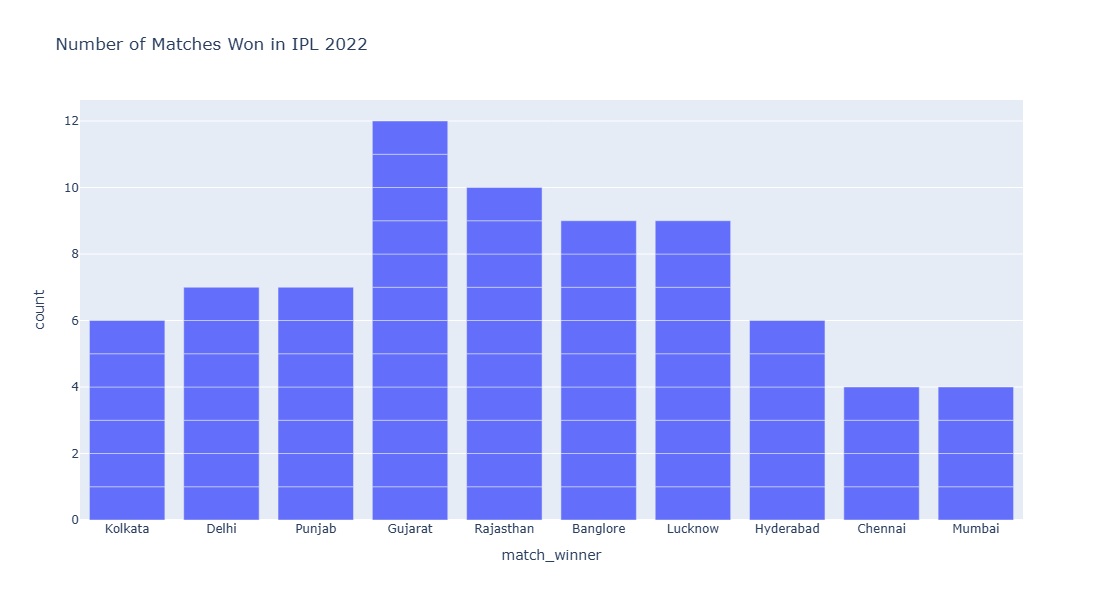

In [23]:
fig = px.bar(df, x = df['match_winner'], title= "Number of Matches Won in IPL 2022", height=600)
fig.show()

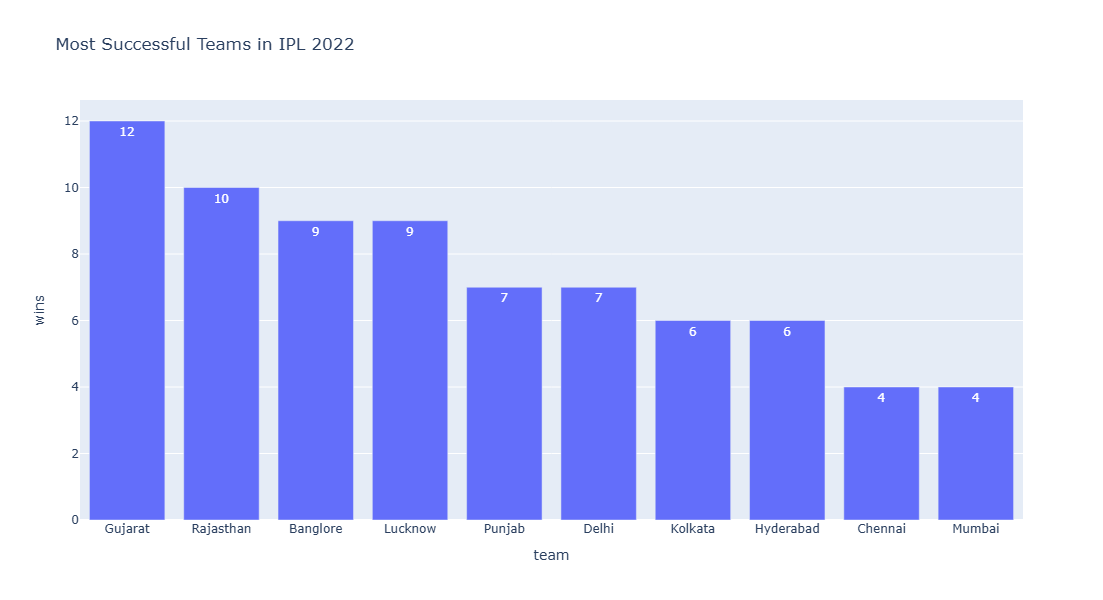

In [53]:
most_wins = df['match_winner'].value_counts().reset_index()
most_wins.columns = ['team', 'wins']

fig = px.bar(most_wins, x='team', y='wins', title='Most Successful Teams in IPL 2022', text='wins', height=600)
fig.show()


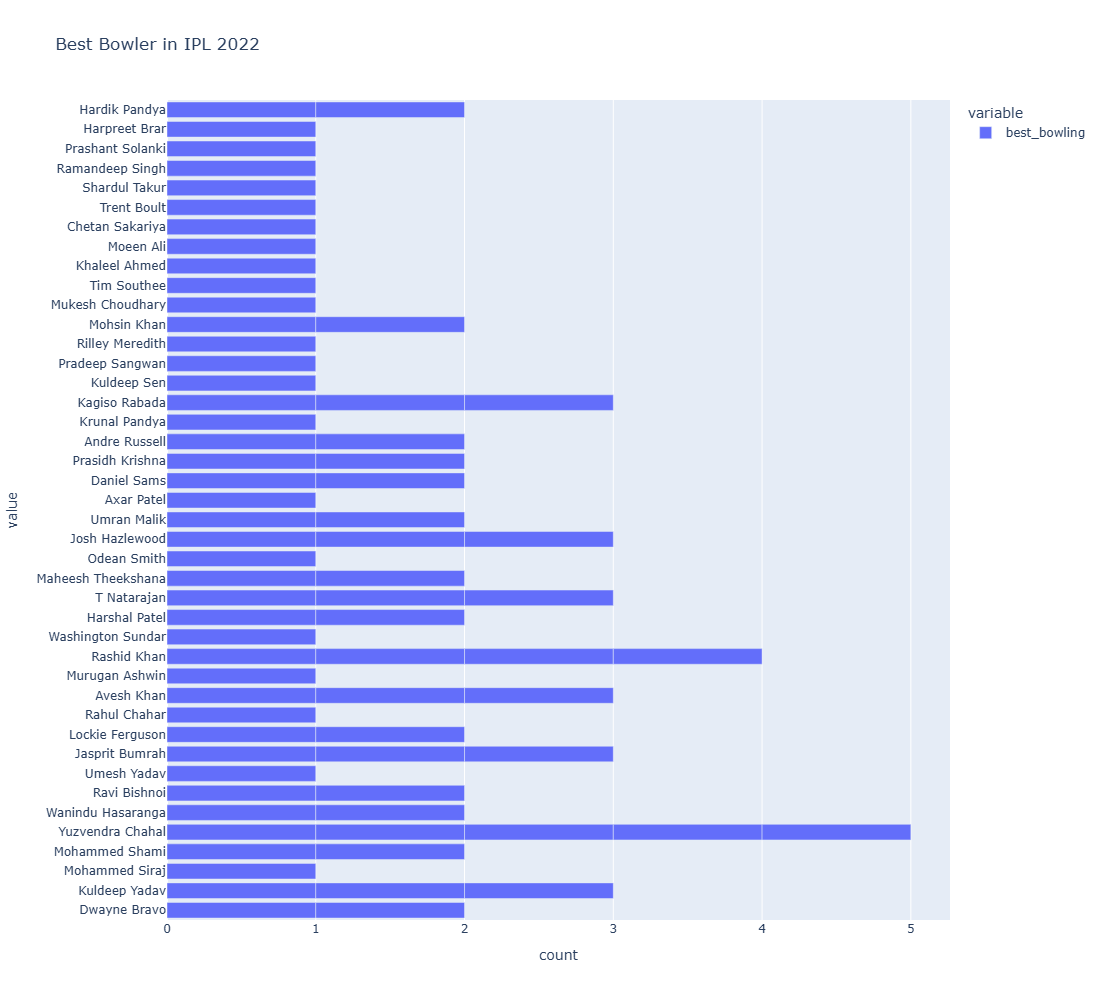

In [42]:
fig = px.bar(df, x=["best_bowling"], title = "Best Bowler in IPL 2022", height=1000)
fig.show()

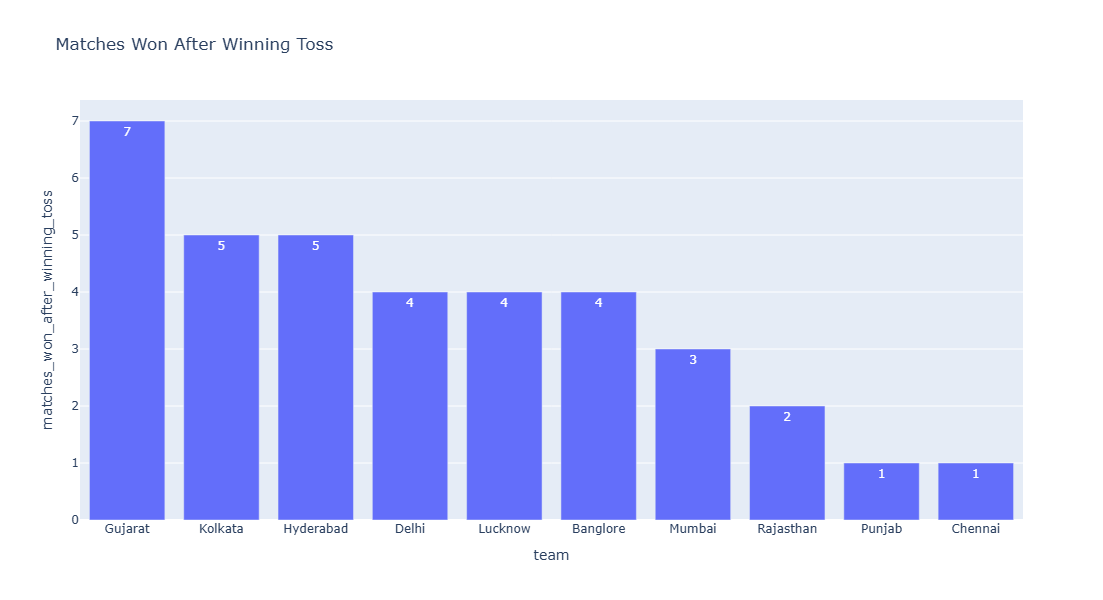

In [66]:
toss_impact = df[df['toss_winner'] == df['match_winner']]
toss_win_count = toss_impact['toss_winner'].value_counts().reset_index()
toss_win_count.columns = ['team', 'matches_won_after_winning_toss']

fig = px.bar(toss_win_count, x='team', y='matches_won_after_winning_toss',
             title='Matches Won After Winning Toss', text='matches_won_after_winning_toss',height=600)
fig.show()


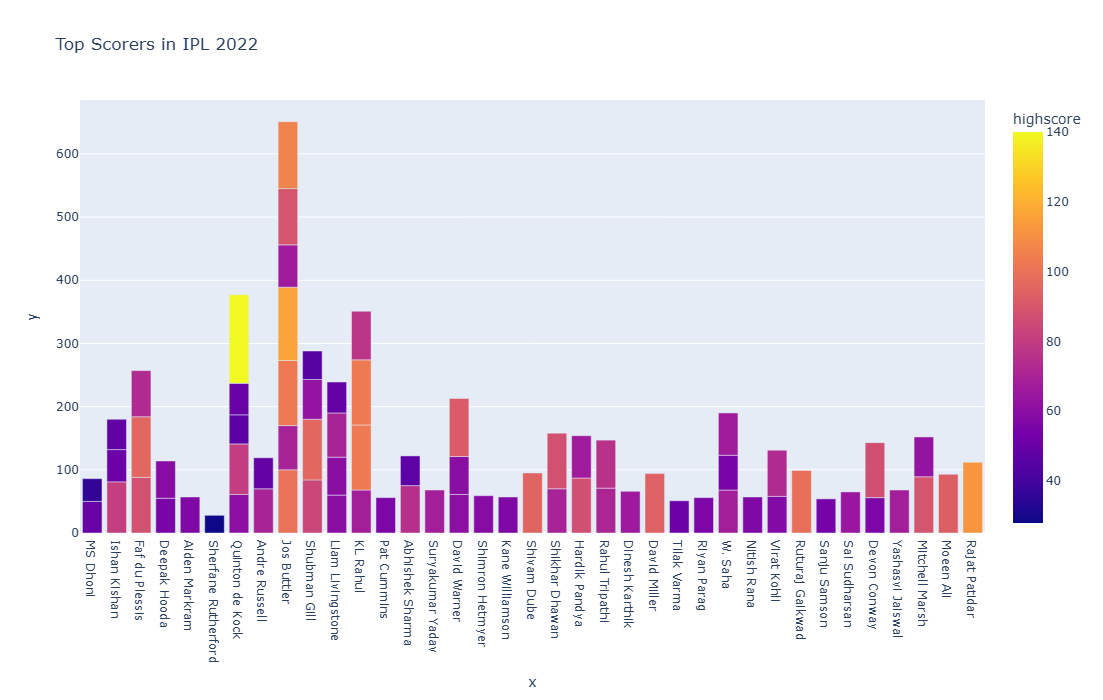

In [49]:
fig=px.bar(data, x=df["top_scorer"], y=df["highscore"], color="highscore", 
           title="Top Scorers in IPL 2022", height=700)
fig.show()

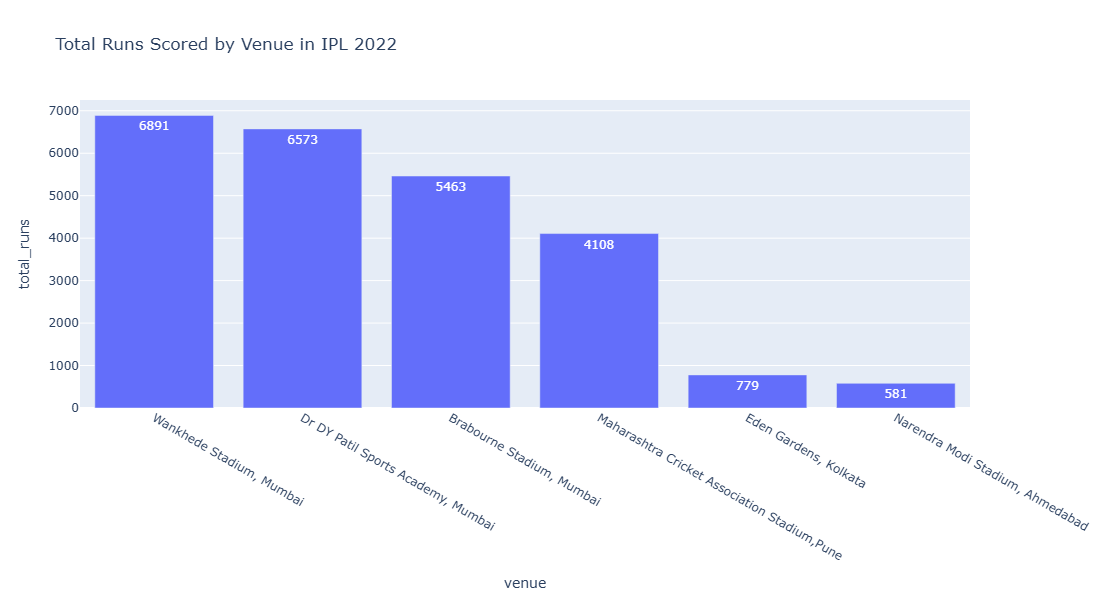

In [55]:
venue_runs = df.groupby('venue')[['first_ings_score', 'second_ings_score']].sum().reset_index()
venue_runs['total_runs'] = venue_runs['first_ings_score'] + venue_runs['second_ings_score']

fig = px.bar(venue_runs.sort_values(by='total_runs', ascending=False),
             x='venue', y='total_runs', title='Total Runs Scored by Venue in IPL 2022', text='total_runs', height=600)
fig.show()


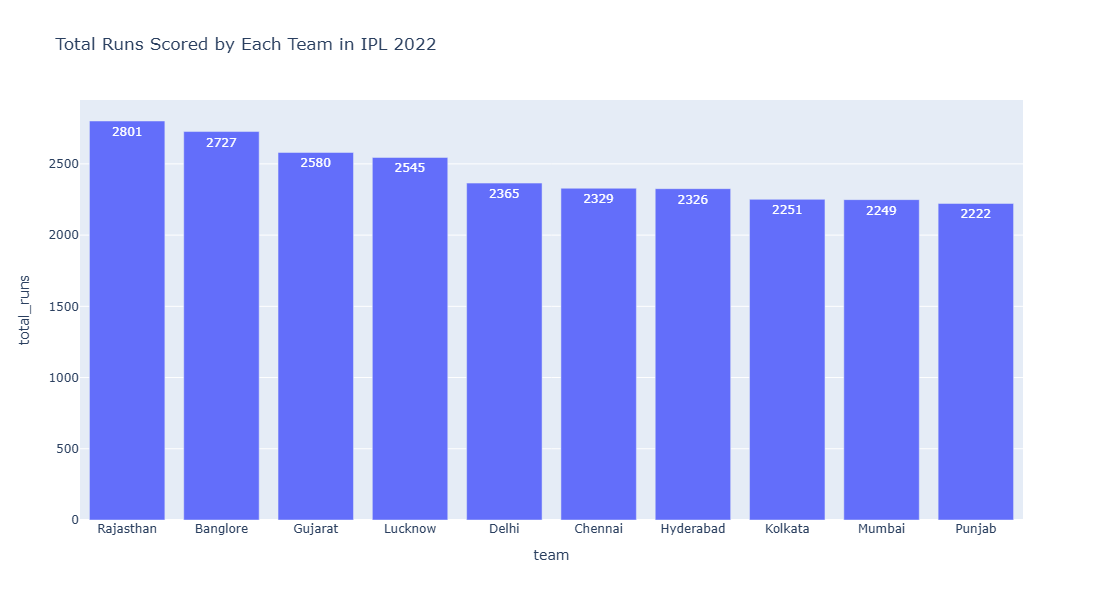

In [57]:
df['total_runs_team1'] = df['first_ings_score']
df['total_runs_team2'] = df['second_ings_score']

team1_runs = df.groupby('team1')['total_runs_team1'].sum()
team2_runs = df.groupby('team2')['total_runs_team2'].sum()
team_total_runs = (team1_runs.add(team2_runs, fill_value=0)).reset_index()
team_total_runs.columns = ['team', 'total_runs']

fig = px.bar(team_total_runs.sort_values(by='total_runs', ascending=False),
             x='team', y='total_runs', title='Total Runs Scored by Each Team in IPL 2022', text='total_runs', height=600)
fig.show()


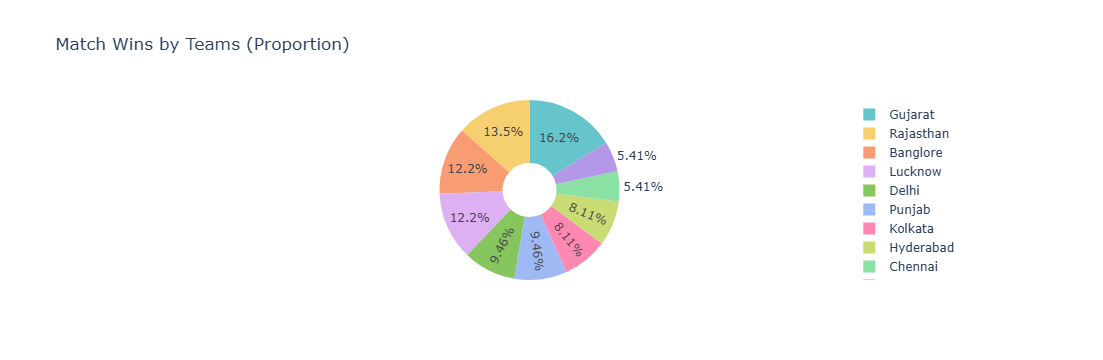

In [58]:
fig = px.pie(df, names='match_winner', title='Match Wins by Teams (Proportion)',
             hole=0.3, color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()
